# PREDICTIONS v/s ACTUAL

# ----------------------------------------------------------

In [20]:
# Import Dependencies & Model
import tensorflow as tf
import import_ipynb
import Model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import BinaryAccuracy, FalsePositives, FalseNegatives, TrueNegatives, TruePositives, Precision, Recall, F1Score, AUC

# ----------------------------------------------------------

## FALSE NEGATIVE -> Truth is POSITIVE, but Model predicted NEGATIVE
## FALSE POSITIVE -> Truth is NEGATIVE, but Model predicted POSITIVE

### Which is more crucial for our model depends on the task. 
#### For Example -> For Malaria Detection Task, False Negatives are more dangerous than False Positives

# ----------------------------------------------------------

## TRUE NEGATIVE -> Truth is NEGATIVE, but Model predicted NEGATIVE
## TRUE POSITIVE -> Truth is POSITIVE, but Model predicted POSITIVE

# ----------------------------------------------------------

# CONFUSION MATRIX

In [22]:
#            PRED
# ACTUAL     0   1
# 0         [TN FP]
# 1         [FN TP]

# ----------------------------------------------------------

# PRECISION -> Minimizes False Positives
## P = TP / (TP+FP)

# ----------------------------------------------------------

# RECALL -> Minimizes False Negatives
## R = TP / (TP+FN)

# ----------------------------------------------------------

### THERE IS A TRADE-OFF BETWEEN PRECISION & RECALL

# ----------------------------------------------------------

# ACCURACY -> Correct Predictions / Total Predictions
## Acc = (TN+TP) / (TN+TP+FN+FP)

# ----------------------------------------------------------

# F1-SCORE -> Genralized Metric for both Precision & Recall
## F1 = (2xPxR) / (P+R)

# ----------------------------------------------------------

# SPECIFICITY -> How well the model avoids False Positives
## S = TN / (TN+FP)

# ----------------------------------------------------------

# ROC-CURVE -> Reciever Operating Characteristic Curve

## A curve between FP-Rate (X-Axis) and TP-Rate (Y-Axis) at different Threshold Levels

### TP-Rate = TP / (TP+FN) = Recall (Also Called Sensitivity)
### FP-Rate = FP / (FP+TN) = 1 - Specificity

![Example of ROC-Curve](Roc.png)

## Used to find a Threshold(t) for our Classification Model
### Suppose our current Threshold(t) is 0.5 => output<0.5 means Negative and output>0.5 means Positive
### Now, if we reduce our Threshold(t) to say, 0.3 => More samples would be now Positive
### This means that, reducing threshold(t) here, helps use reduce False Negatives
## This ROC-Curve will help us find such a Theshold(t) without affecting the TN and TP much
### A point on the ROC-Curve will give us the Threshold(t) 
### For Better Recall -> Where TPR is Maximum & FPR is Good Enough Low
### For Better Precision -> Where FPR is Minimum & TPR is Good Enough High

# ----------------------------------------------------------

# AUC -> Area Under ROC-Curve
## AUC summarizes performance across all possible classification thresholds, making it useful when you need a single metric for comparison
## Higher AUC values indicate a better ability of the model to separate positive and negative classes
### Range of AUC Values:
#### •	1.0: Perfect classifier (ideal separation of classes).
#### •	0.9 - 1.0: Excellent classification.
#### •	0.8 - 0.9: Good classification.
#### •	0.7 - 0.8: Fair classification.
#### •	0.5 - 0.7: Poor classification (close to random guessing).
#### •	0.5: Random guessing (no discrimination between classes).
#### •	< 0.5: Worse than random guessing (model is likely misclassifying).
## AUC does not depend on the threshold used for classification, unlike accuracy or precision
### AUC of 0.95 means that 95% of the time, the model will rank a spam email higher than a non-spam email for a Spam-Detection-Model

# ----------------------------------------------------------

# Adding These Metrics To Our Previously Trained CNN Model

In [3]:
# Model Metrics
Metrics = [BinaryAccuracy(), FalsePositives(), FalseNegatives(), TrueNegatives(), TruePositives(), Precision(), Recall(), AUC()]

In [4]:
Model.model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 6)    │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 16)   │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 46656)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     4,665,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,668,297 (17.81 MB)

 Trainable params: 4,668,033 (17.81 MB)

 Non-trainable params: 264 (1.03 KB)

In [5]:
Model.model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=Metrics
)

In [6]:
history = Model.model.fit(Model.trainDataset, validation_data=Model.valDataset, epochs=5, verbose=1)

Epoch 1/5


2025-01-21 10:25:23.827160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


689/689 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - auc: 0.7969 - binary_accuracy: 0.7301 - false_negatives: 789.3275 - false_positives: 1807.2406 - loss: 0.5696 - precision: 0.6975 - recall: 0.8188 - true_negatives: 3711.4739 - true_positives: 4747.9058 - val_auc: 0.9504 - val_binary_accuracy: 0.9132 - val_false_negatives: 158.0000 - val_false_positives: 81.0000 - val_loss: 0.5062 - val_precision: 0.9384 - val_recall: 0.8865 - val_true_negatives: 1282.0000 - val_true_positives: 1234.0000
Epoch 2/5
689/689 ━━━━━━━━━━━━━━━━━━━━ 39s 57ms/step - auc: 0.9481 - binary_accuracy: 0.9018 - false_negatives: 323.1812 - false_positives: 770.1899 - loss: 0.3070 - precision: 0.8724 - recall: 0.9428 - true_negatives: 4748.5029 - true_positives: 5214.0737 - val_auc: 0.9656 - val_binary_accuracy: 0.9241 - val_false_negatives: 75.0000 - val_false_positives: 134.0000 - val_loss: 0.2561 - val_precision: 0.9075 - val_recall: 0.9460 - val_true_negatives: 1232.0000 - val_true_positives: 1314.0000
Epoch 3/5
689/689

In [7]:
Model.model.evaluate(Model.testDataset)

87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - auc: 0.9610 - binary_accuracy: 0.9228 - false_negatives: 55.7273 - false_positives: 57.7273 - loss: 0.2631 - precision: 0.9223 - recall: 0.9234 - true_negatives: 655.5568 - true_positives: 654.0114


[0.27268487215042114,
 0.9173014163970947,
 117.0,
 111.0,
 1279.0,
 1250.0,
 0.9144111275672913,
 0.9184423089027405,
 0.9595290422439575]

# ----------------------------------------------------------

# PLOTTING THE CONFUSION MATRIX

In [11]:
# Import Metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [12]:
# Getting the Labels and Inputs
labels = []
inputs = []
for x, y in Model.testDataset.as_numpy_iterator():
    for i in range(len(y)):
        labels.append(y[i])
        inputs.append(x[i])
labels = np.array(labels)
inputs = np.array(inputs)
print(labels)
print(labels.shape)
print(inputs.shape)

2025-01-21 10:32:19.810236: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


[1 0 1 ... 1 0 0]
(2757,)
(2757, 224, 224, 3)


In [15]:
# Getting the Predictions
predicted = Model.model.predict(inputs)
print(predicted.shape)
predicted = predicted[:, 0]
print(predicted.shape)
print(predicted)

87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
(2757, 1)
(2757,)
[0.8638765  0.2911998  0.96704626 ... 0.9418531  0.04247855 0.21392119]


In [24]:
# Getting Confusion Matrix
threshold = 0.5 # Default Value
cm = confusion_matrix(labels, predicted>threshold) # -> predictedValue>t means 1
print(cm)

[[1279  117]
 [ 111 1250]]


In [19]:
# Reducing Threshold
threshold = 0.2 # Default Value
cm = confusion_matrix(labels, predicted>threshold) # -> predictedValue>t means 1
print(cm)

print("\n")

# Increasing Threshold
threshold = 0.7 # Default Value
cm = confusion_matrix(labels, predicted>threshold) # -> predictedValue>t means 1
print(cm)

[[1109  287]
 [  79 1282]]


[[1335   61]
 [ 141 1220]]


Text(0.5, 14.722222222222216, 'Predicted')

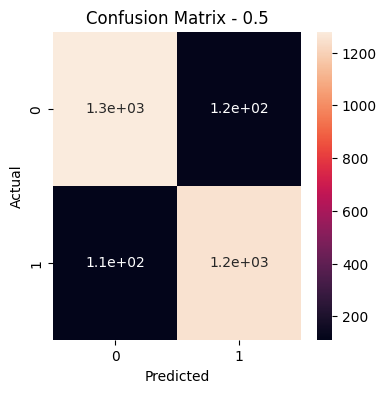

In [25]:
# Plotting the Confusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix - {}".format(threshold))
plt.ylabel('Actual')
plt.xlabel('Predicted')

# ----------------------------------------------------------

# USING THE ROC-CURVE

In [26]:
# Import ROC-Curve
from sklearn.metrics import roc_curve

In [29]:
# Getting Outputs
fprs, tprs, thresholds = roc_curve(labels, predicted)
print(len(fprs), len(tprs), len(thresholds))

346 346 346


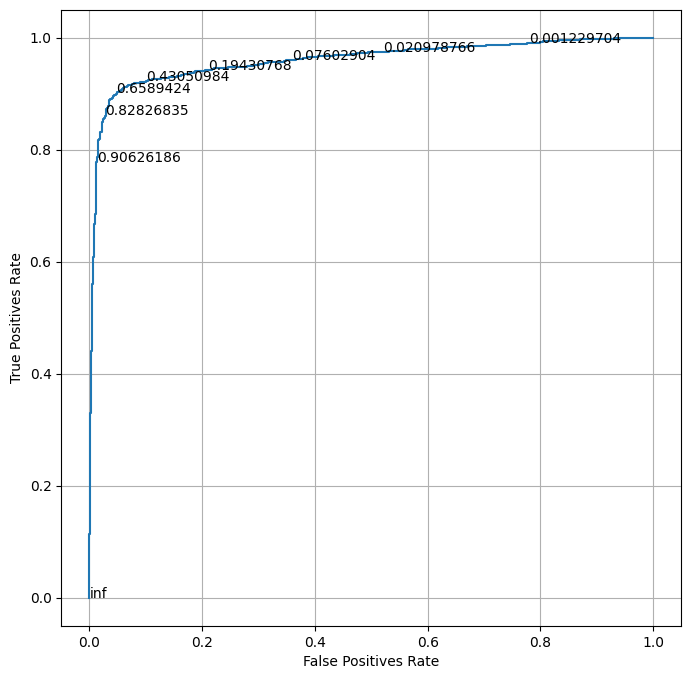

In [34]:
# Plotting the ROC-Curve
plt.figure(figsize=(8, 8))
plt.plot(fprs, tprs)
plt.xlabel("False Positives Rate")
plt.ylabel("True Positives Rate")
plt.grid()

# Adding Text On Graph
skip=40
for i in range(0, len(thresholds), skip):
    plt.text(fprs[i], tprs[i], thresholds[i])
plt.show()

## For our Malaria-Detection Problem -> False Negative means False Positives because 0<=>1
### => We need to minimize, False Negatives => Threshold picked can be 0.6589

In [40]:
# Getting Confusion Matrix
threshold = 0.6589
cm = confusion_matrix(labels, predicted>threshold) # -> predictedValue>t means 1
print(cm)

[[1329   67]
 [ 134 1227]]


Text(0.5, 14.722222222222216, 'Predicted')

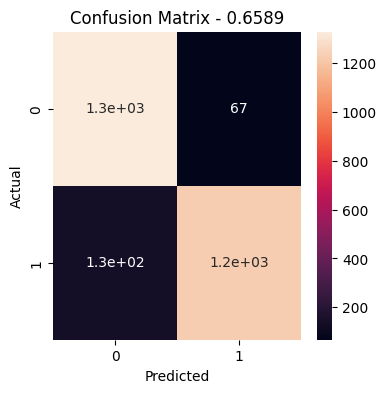

In [41]:
# Plotting the Confusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True)
plt.title("Confusion Matrix - {}".format(threshold))
plt.ylabel('Actual')
plt.xlabel('Predicted')

# ----------------------------------------------------------